In [1]:
### ANN tensorflow classification
# Prediction modelling: To detect fraud insurance claim

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/fraud_oracle.csv')

In [5]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [6]:
# to check if variables are in their correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [7]:
# to check for missing values
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [8]:
# to check for any duplicated values
duplicates = df[df.duplicated()]

In [9]:
# there are no duplicates in dataset
duplicates

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


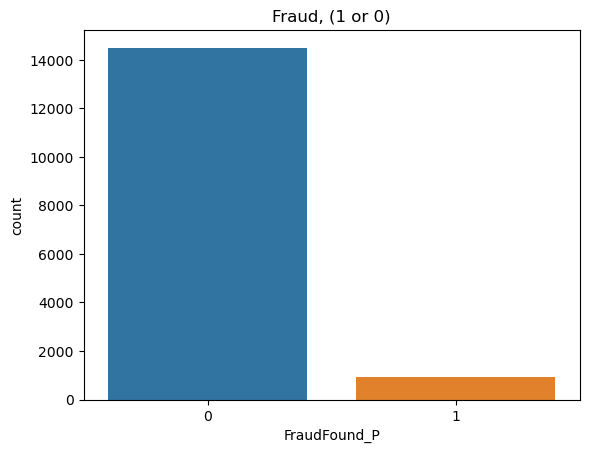

In [10]:
sns.countplot(data=df, x='FraudFound_P')
plt.title('Fraud, (1 or 0)');

In [11]:
df['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

In [12]:
# positive 'Fraud cases' only account for 5% of all cases
pd.DataFrame(100*df['FraudFound_P'].value_counts()/len(df))

,count
FraudFound_P,
0,94.014267
1,5.985733


In [13]:
# to see the total number vehicle insurance claimed by month
df['MonthClaimed'].value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: count, dtype: int64

In [14]:
# to remove the outlier value 0, 
df = df[df['MonthClaimed'] != '0']

In [15]:
# total number of vehicle insurance claimed each month
pd.DataFrame(df['MonthClaimed'].value_counts())

,count
MonthClaimed,
Jan,1446
May,1411
Mar,1348
Oct,1339
Jun,1293
Feb,1287
Nov,1285
Apr,1271
Sep,1242


In [16]:
# to see all categorical variables in dataset
df.select_dtypes('object')

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Friday,Toyota,Urban,Tuesday,Nov,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Nov,Thursday,Pontiac,Urban,Friday,Dec,Male,Married,Policy Holder,Sedan - Liability,...,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Nov,Thursday,Toyota,Rural,Friday,Dec,Male,Single,Policy Holder,Sedan - Collision,...,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Dec,Monday,Toyota,Urban,Thursday,Dec,Female,Married,Third Party,Sedan - All Perils,...,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [17]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

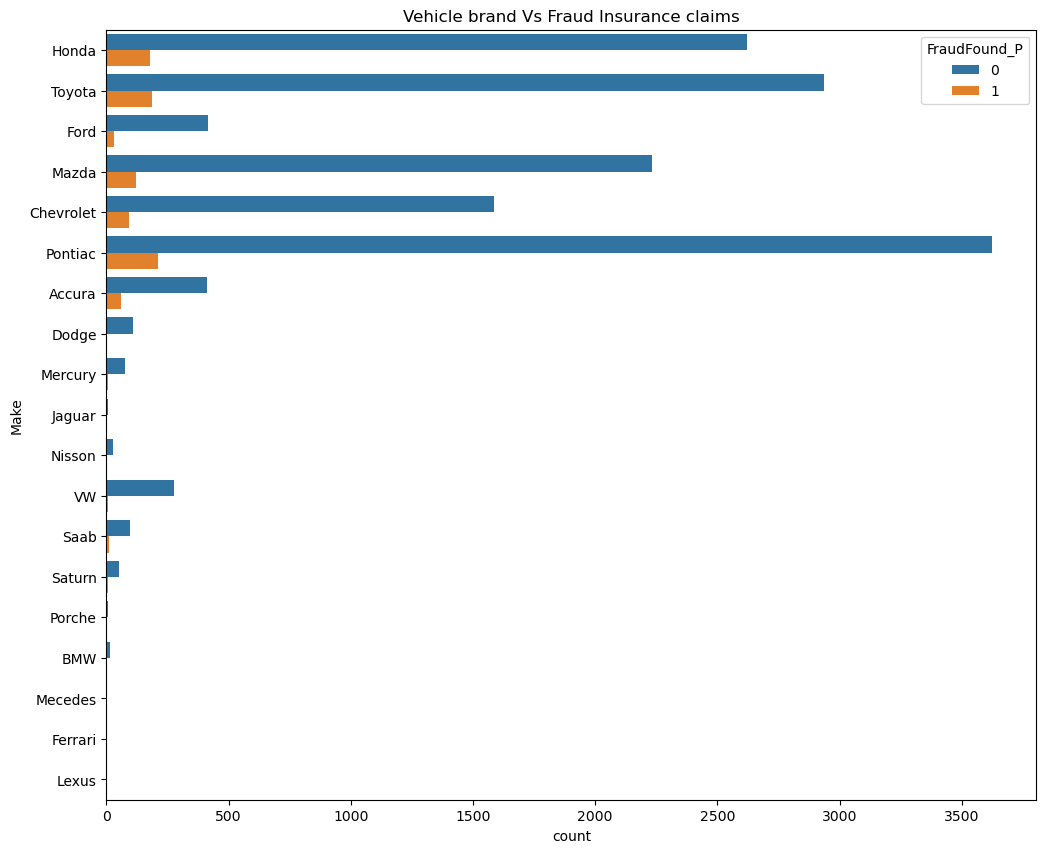

In [18]:
# Brands: 'Pontiac', 'Honda', 'Toyota' is observed to have higher fraud claims than the rest
plt.figure(figsize=(12,10), dpi=100)
sns.countplot(data=df, y='Make', hue='FraudFound_P')
plt.title('Vehicle brand Vs Fraud Insurance claims');

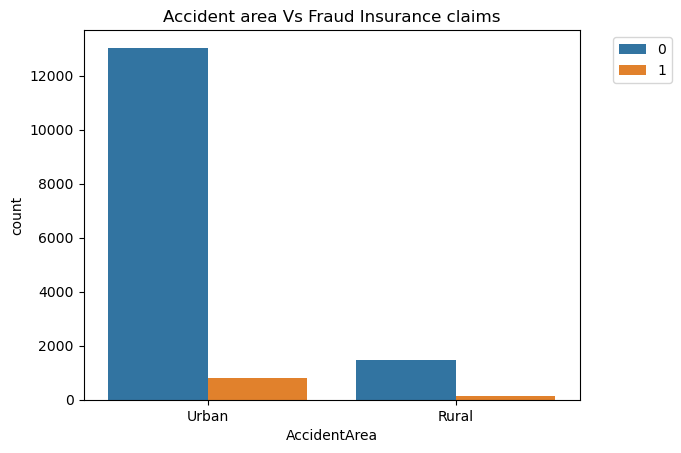

In [19]:
# Urban areas is observed to have higher 'Fraud' vehicle claims
sns.countplot(data=df, x='AccidentArea', hue='FraudFound_P')
plt.title('Accident area Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [20]:
df['DayOfWeekClaimed'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday'], dtype=object)

In [21]:
dayofweekclaimed_order = ['Monday',
                          'Tuesday',
                          'Wednesday',
                          'Thursday',
                          'Friday',
                          'Saturday',
                          'Sunday']

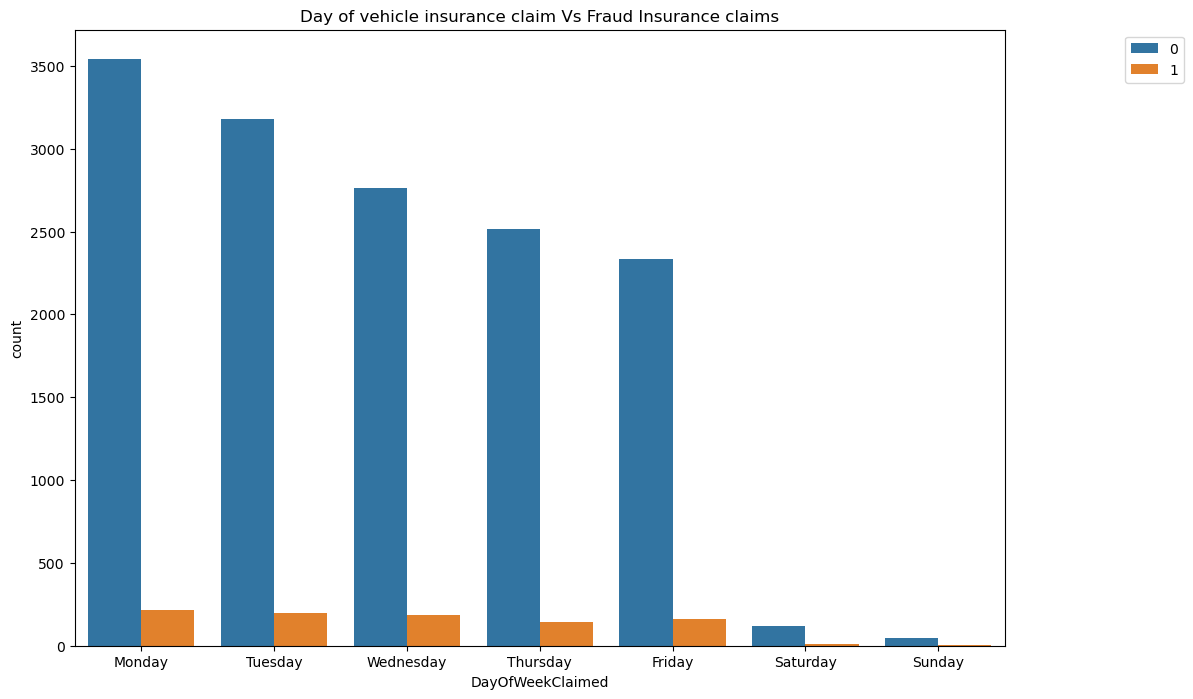

In [22]:
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='DayOfWeekClaimed', order = dayofweekclaimed_order, hue='FraudFound_P')
plt.title('Day of vehicle insurance claim Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

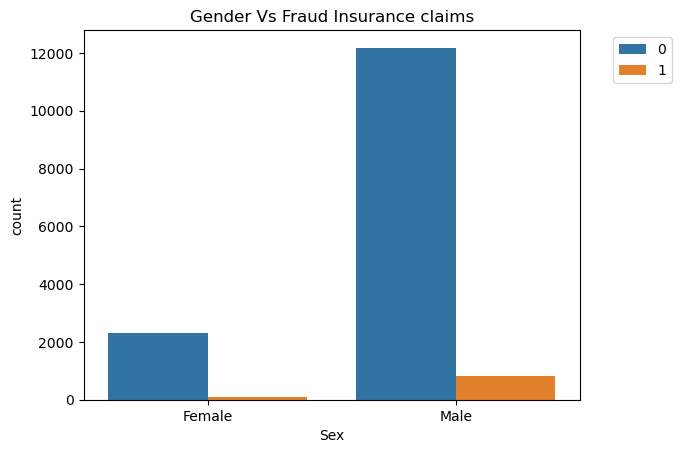

In [23]:
# Males are observed to have a higher Fraud Vehical Insurance claims
sns.countplot(data=df, x='Sex', hue='FraudFound_P')
plt.title('Gender Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

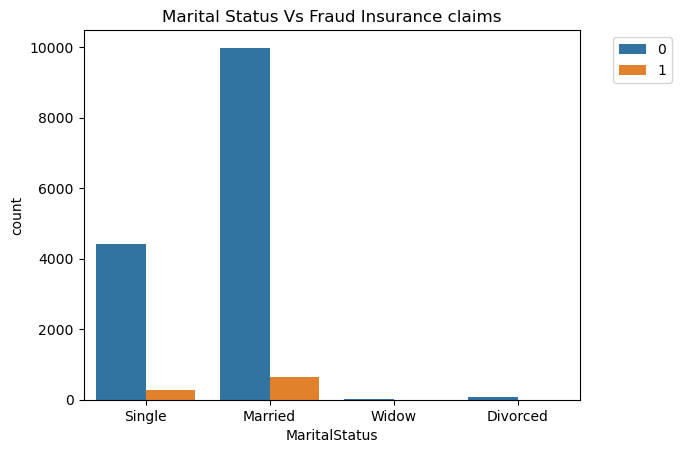

In [24]:
# Policy holders who are married are observed to have higher Fraud insurance claims
sns.countplot(data=df, x='MaritalStatus', hue='FraudFound_P')
plt.title('Marital Status Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [25]:
df['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [26]:
ageofpolicyholder_order = ['16 to 17',
                           '18 to 20',
                          '21 to 25',
                          '26 to 30',
                          '31 to 35',
                          '36 to 40',
                          '41 to 50',
                          '51 to 65',
                          'over 65']

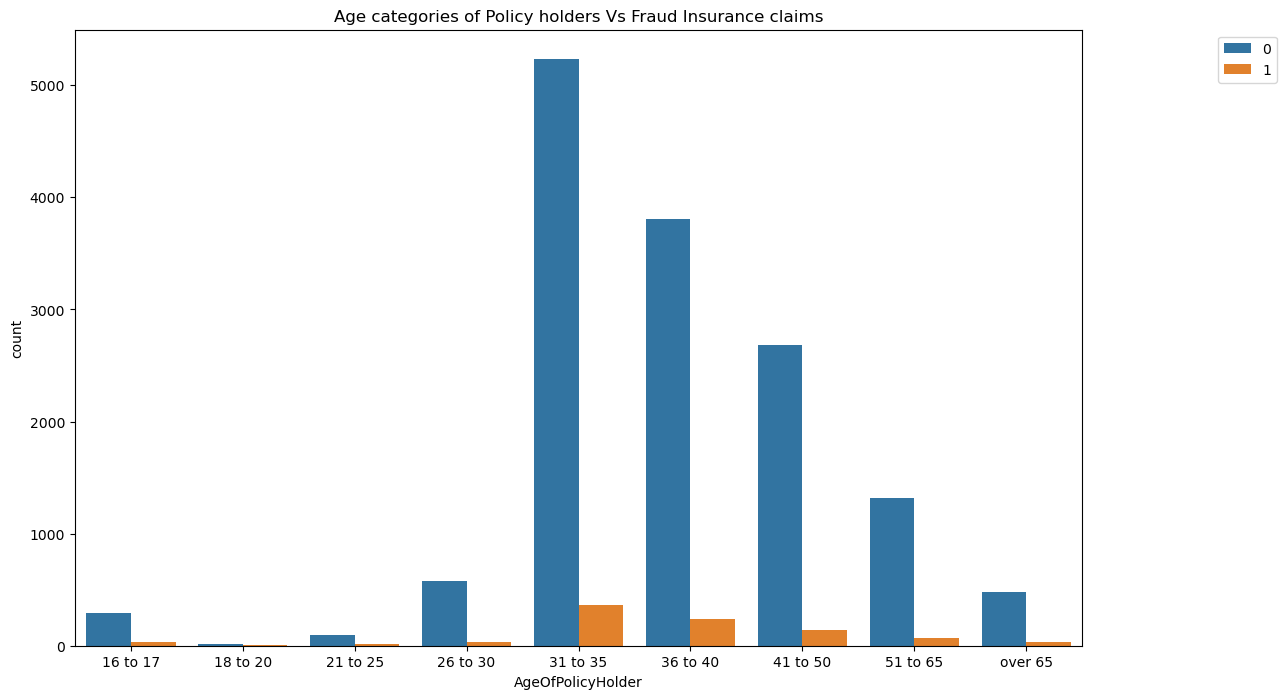

In [27]:
# '31 to 35' and '36 to 40 age group seems to have the highest Fraud Vehical claims
plt.figure(figsize=(13,8), dpi=100)
sns.countplot(data=df, x='AgeOfPolicyHolder', order = ageofpolicyholder_order, hue='FraudFound_P')
plt.title('Age categories of Policy holders Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

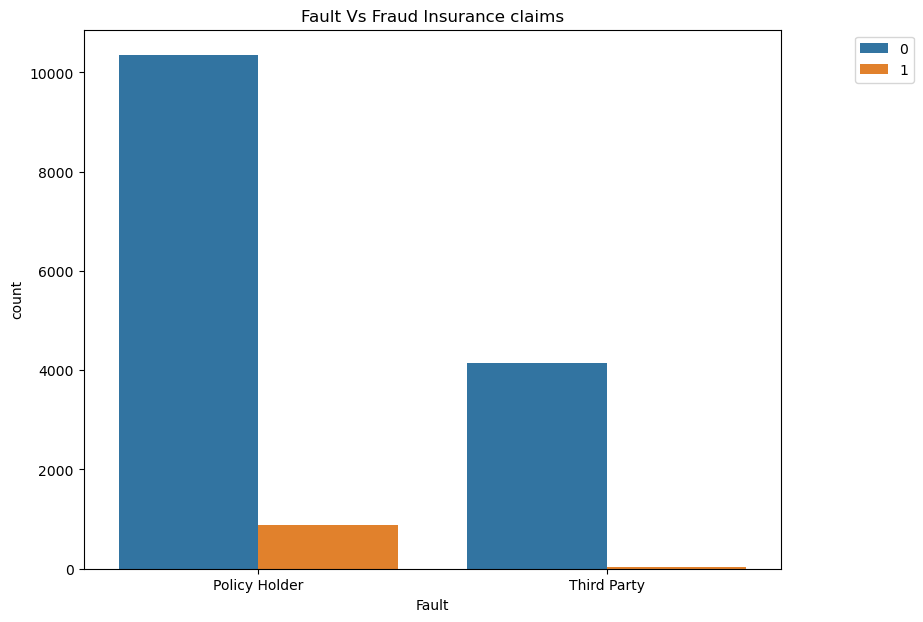

In [28]:
plt.figure(figsize=(9,7), dpi=100)
sns.countplot(data=df, x='Fault', hue='FraudFound_P')
plt.title('Fault Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

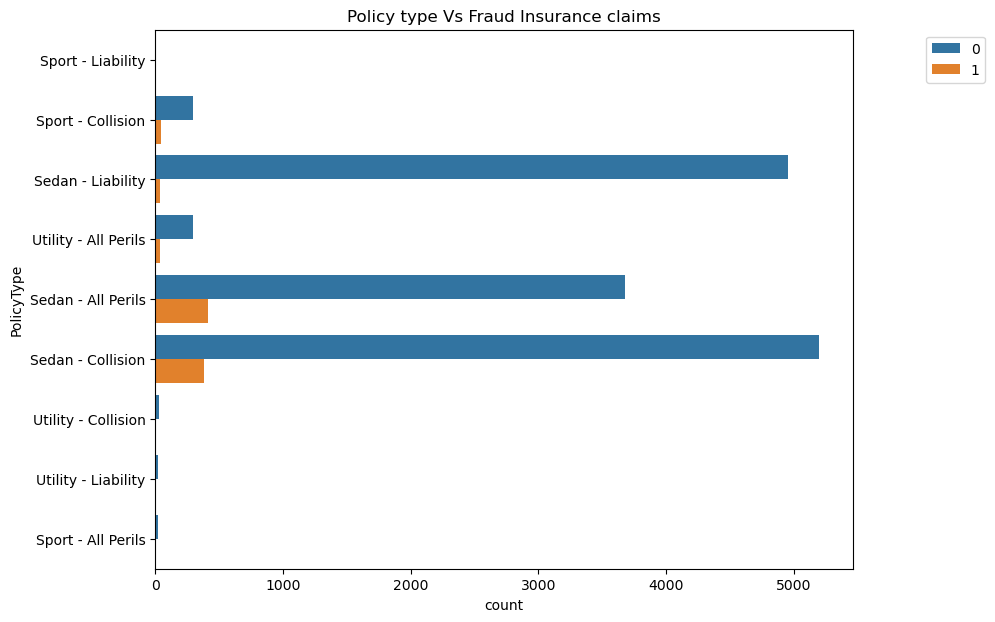

In [29]:
# Sedan is observed to have higher Vehicle fraud insurance claims 
plt.figure(figsize=(9,7), dpi=100)
sns.countplot(data=df, y='PolicyType', hue='FraudFound_P')
plt.title('Policy type Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

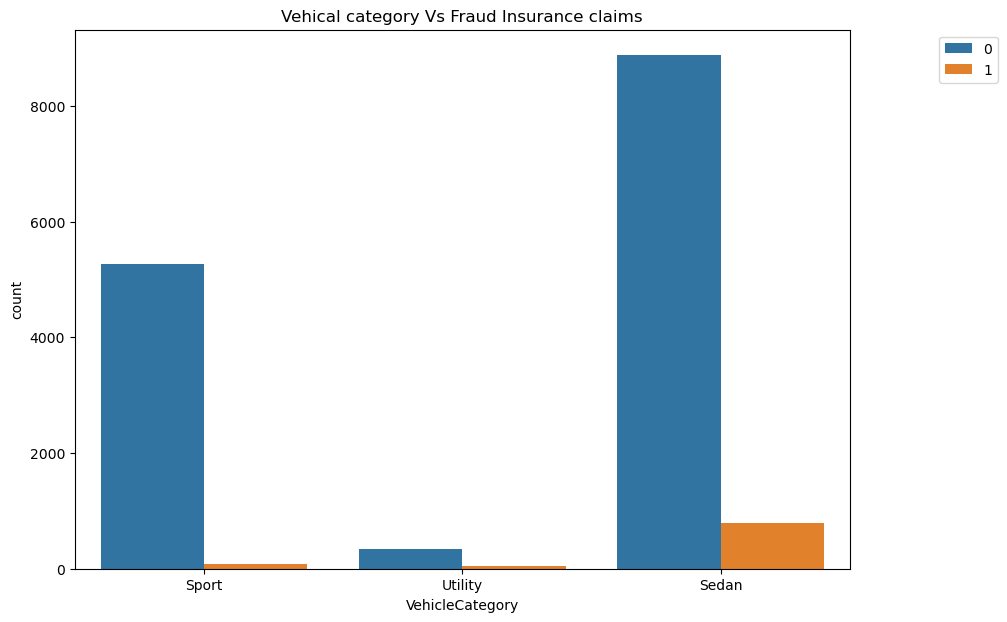

In [30]:
plt.figure(figsize=(10,7), dpi=100)
sns.countplot(data=df, x='VehicleCategory', hue='FraudFound_P')
plt.title('Vehical category Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [31]:
df['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [32]:
vehicleprice_order = ['less than 20000',
                      '20000 to 29000',
                      '30000 to 39000',
                      '40000 to 59000',
                      '60000 to 69000',
                      'more than 69000']

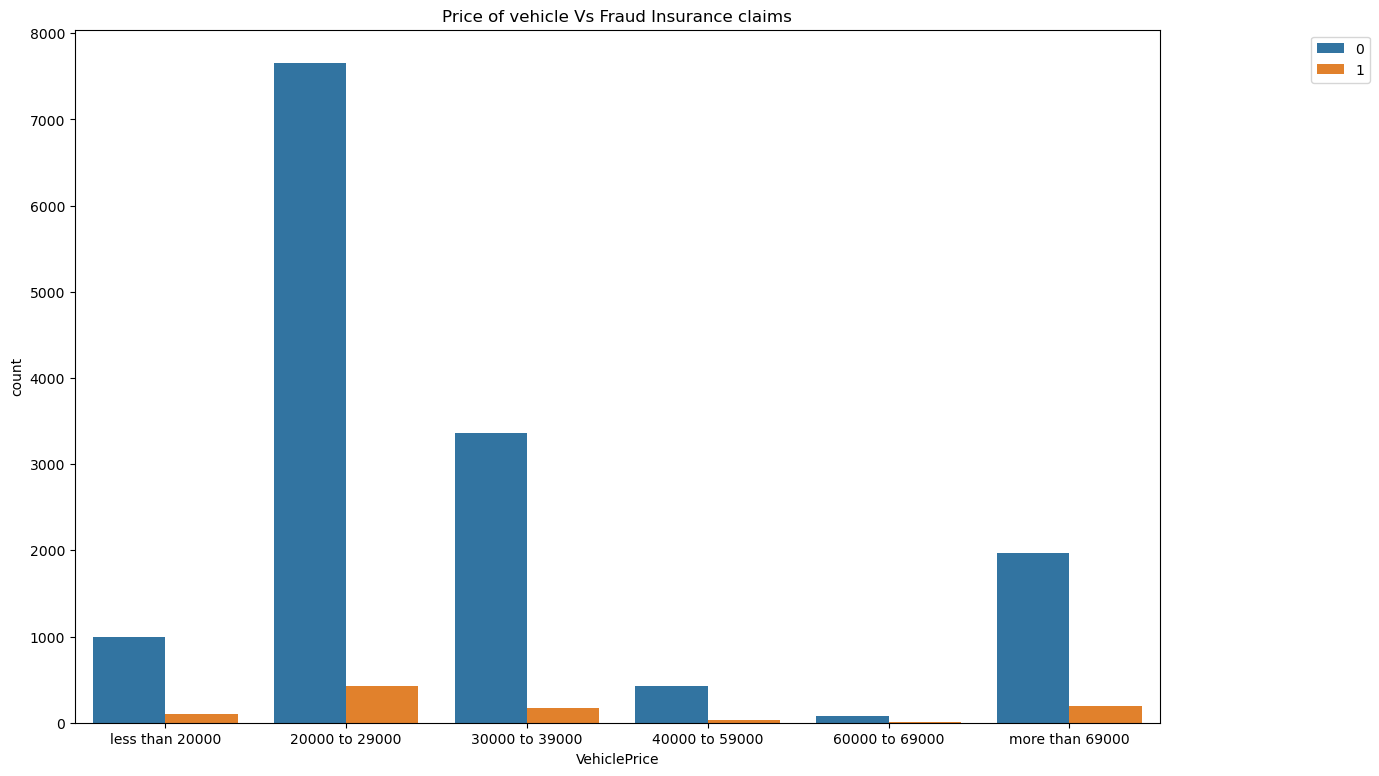

In [33]:
plt.figure(figsize=(14,9), dpi=100)
sns.countplot(data=df, x='VehiclePrice', order =vehicleprice_order, hue='FraudFound_P')
plt.title('Price of vehicle Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

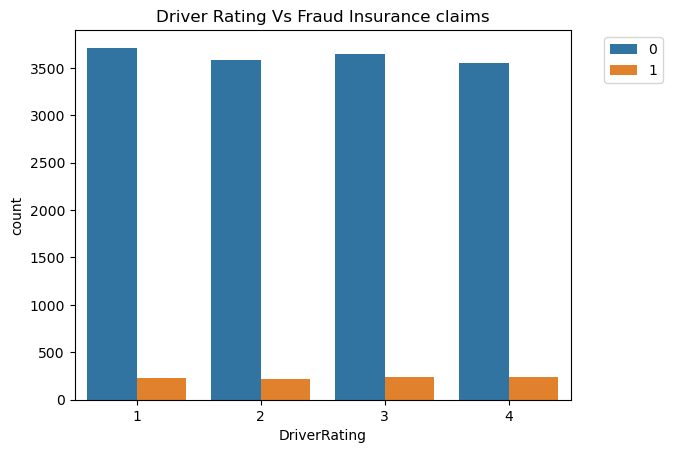

In [34]:
# it is observed that all ratings have equal number of Fraud vehical insurance claims
sns.countplot(data=df, x='DriverRating', hue='FraudFound_P')
plt.title('Driver Rating Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [35]:
df['Days_Policy_Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [36]:
dayspolicyaccident_order = ['none',
                            '1 to 7',
                            '8 to 15',
                            '15 to 30',
                            'more than 30']

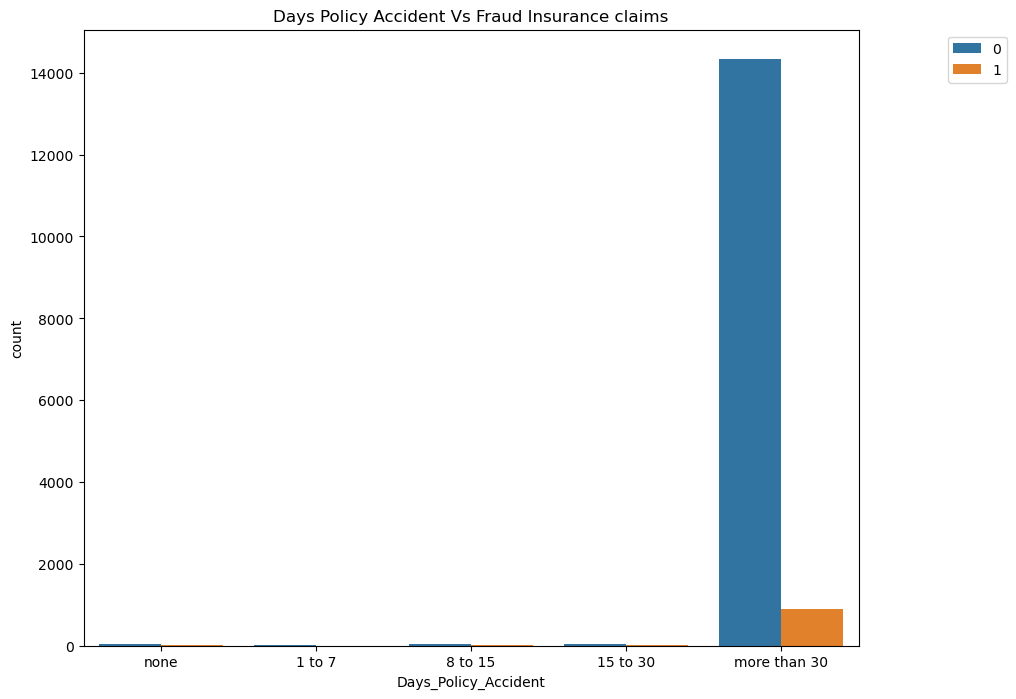

In [37]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x='Days_Policy_Accident', order = dayspolicyaccident_order, hue='FraudFound_P')
plt.title('Days Policy Accident Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [38]:
df['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15'], dtype=object)

In [39]:
dayspolicyclaim_order = ['8 to 15',
                         '15 to 30',
                         'more than 30']

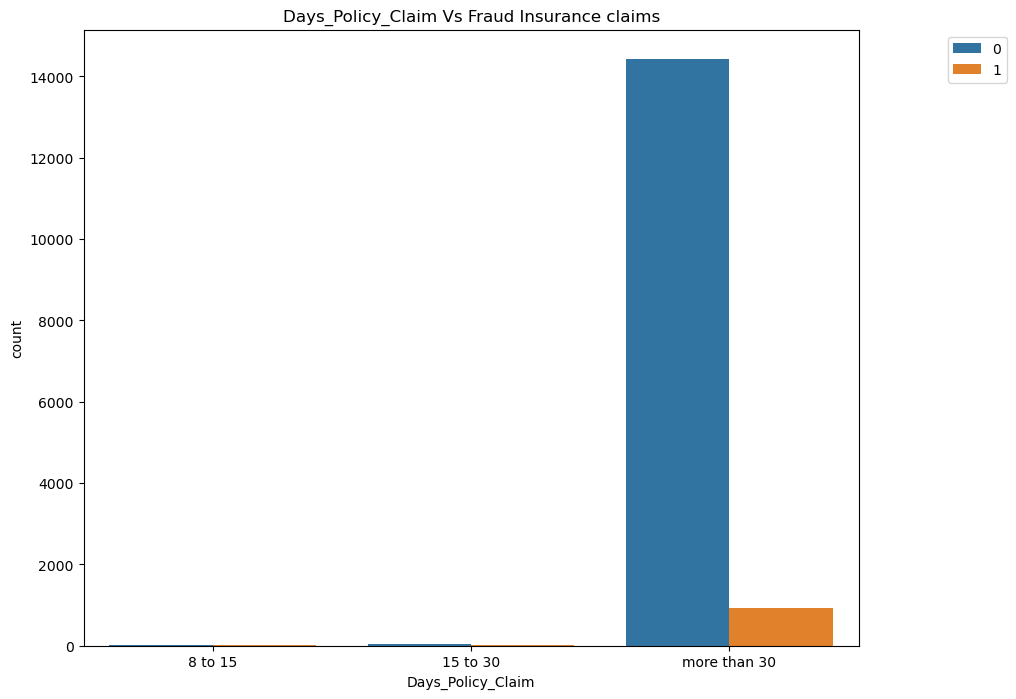

In [40]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x='Days_Policy_Claim', order= dayspolicyclaim_order, hue='FraudFound_P')
plt.title('Days_Policy_Claim Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

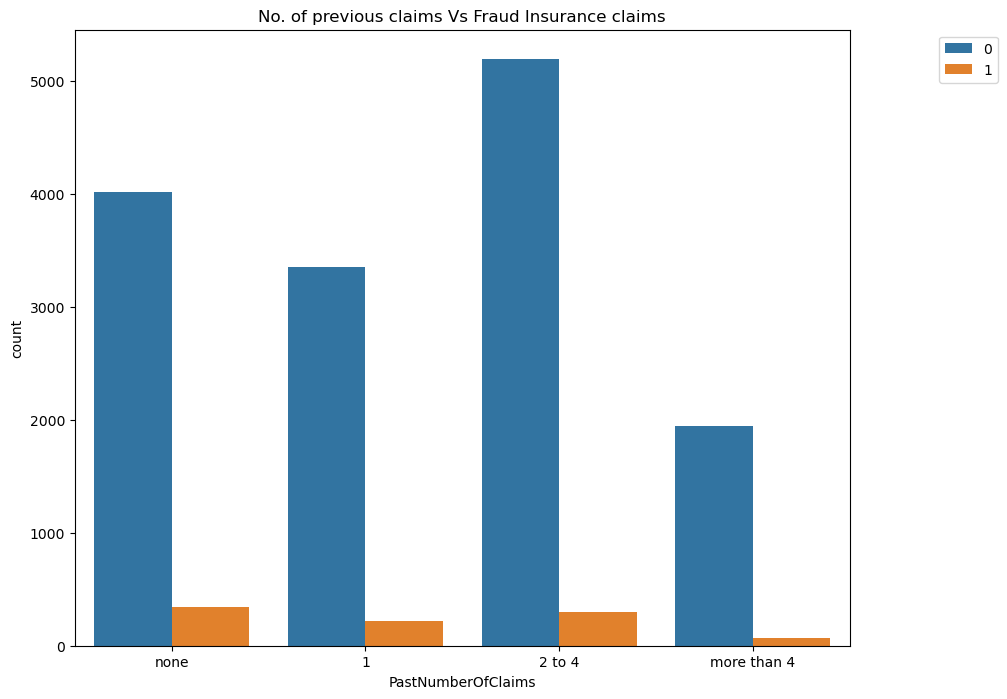

In [41]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x='PastNumberOfClaims', hue='FraudFound_P')
plt.title('No. of previous claims Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [42]:
df['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [43]:
ageofvehicle_order = ['new',
                      '2 years',
                      '3 years',
                      '4 years',
                      '5 years',
                      '6 years',
                      '7 years',
                      'more than 7']

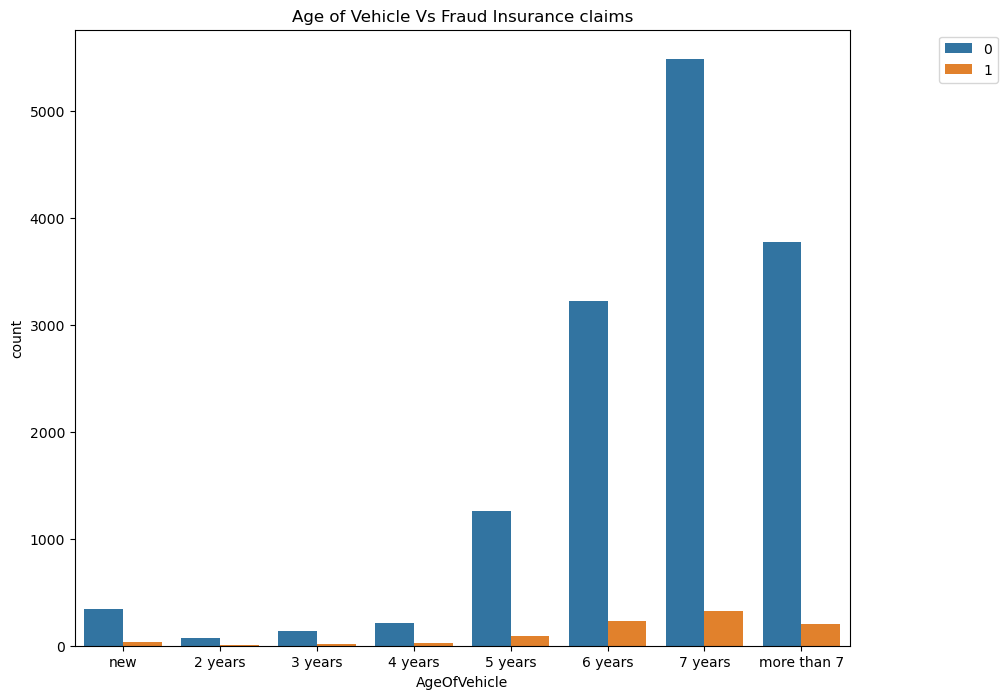

In [44]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x='AgeOfVehicle', order= ageofvehicle_order, hue='FraudFound_P')
plt.title('Age of Vehicle Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

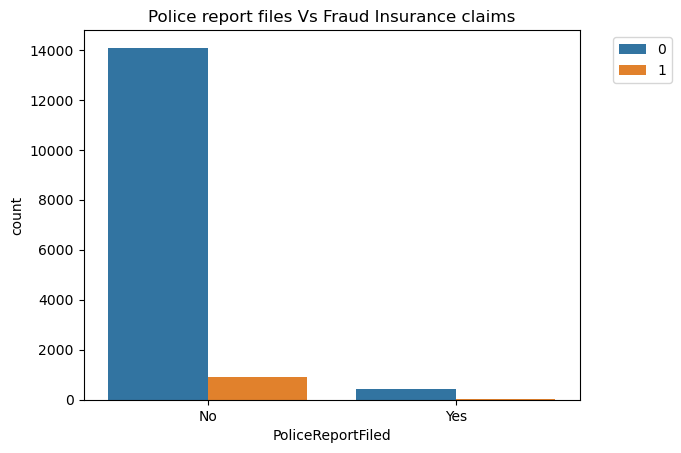

In [45]:
sns.countplot(data=df, x='PoliceReportFiled', hue='FraudFound_P')
plt.title('Police report files Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

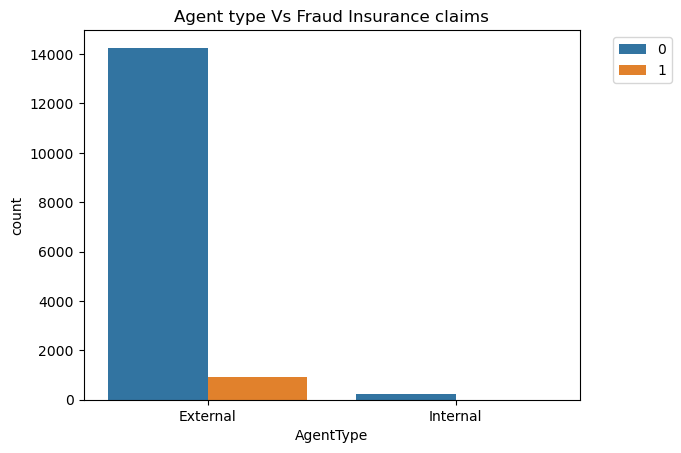

In [46]:
sns.countplot(data=df, x='AgentType', hue='FraudFound_P')
plt.title('Agent type Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

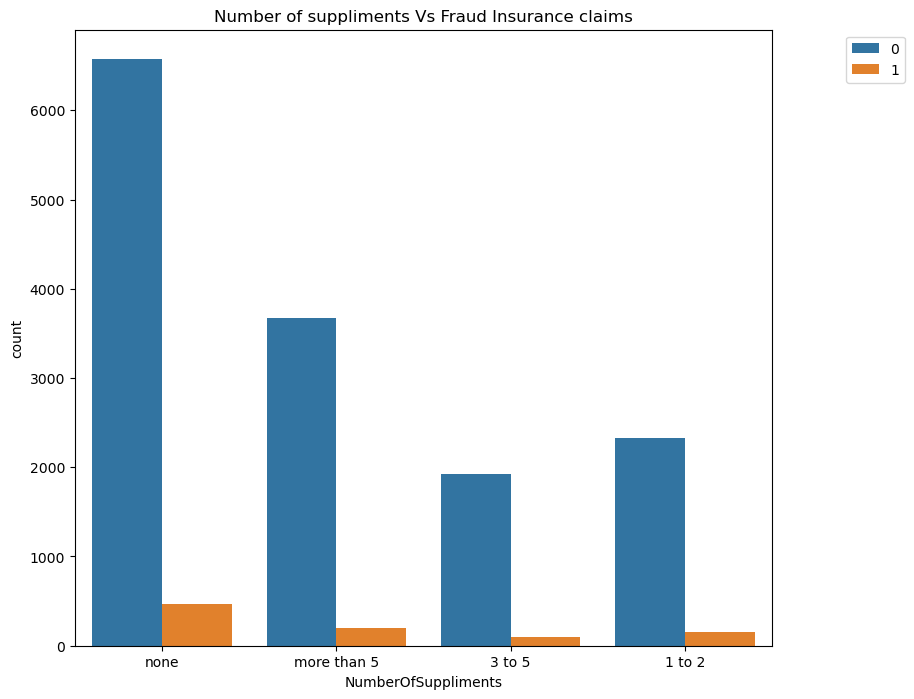

In [47]:
plt.figure(figsize=(9,8), dpi=100)
sns.countplot(data=df, x='NumberOfSuppliments', hue='FraudFound_P')
plt.title('Number of suppliments Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [48]:
df['AddressChange_Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [49]:
addresschangeclaim_order = ['no change',
                            'under 6 months',
                            '1 year',
                            '2 to 3 years',
                            '4 to 8 years']

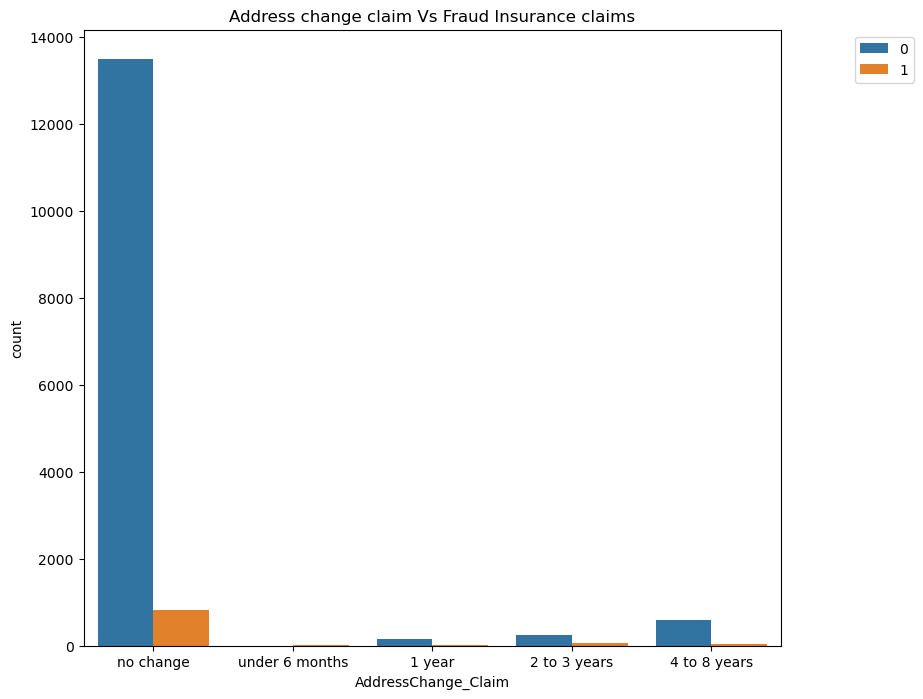

In [50]:
plt.figure(figsize=(9,8), dpi=100)
sns.countplot(data=df, x='AddressChange_Claim', order=addresschangeclaim_order, hue='FraudFound_P')
plt.title('Address change claim Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [51]:
df['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [52]:
numberofcars_order = ['1 vehicle',
                      '2 vehicles',
                      '3 to 4',
                      '5 to 8',
                      'more than 8']

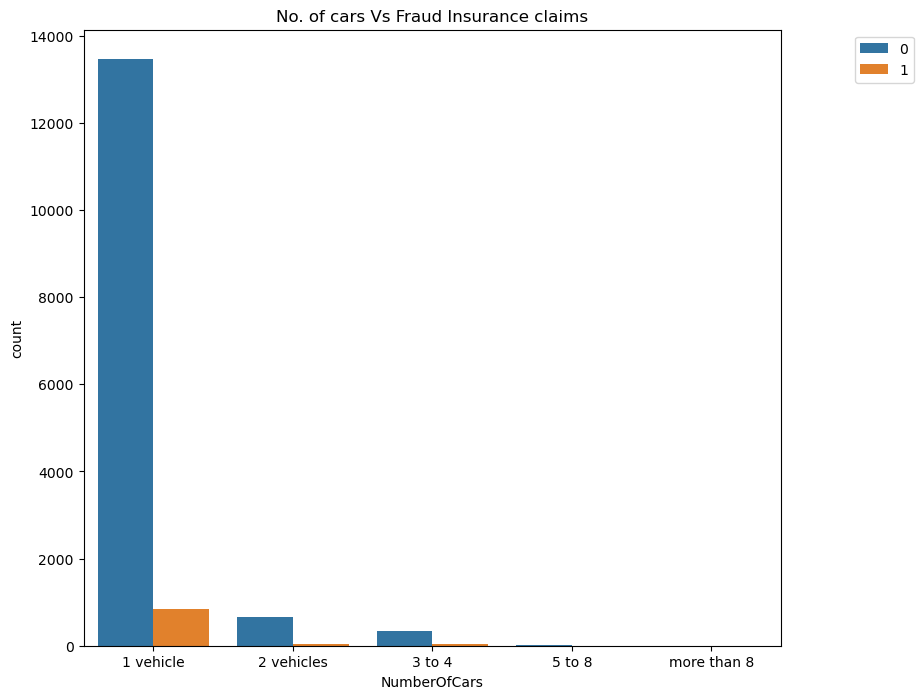

In [53]:
plt.figure(figsize=(9,8), dpi=100)
sns.countplot(data=df, x='NumberOfCars', order= numberofcars_order, hue='FraudFound_P')
plt.title('No. of cars Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [54]:
# to see the number of Vehical insurances claim by year
# 1994 has the highest vehicle insurance claim
pd.DataFrame(df['Year'].value_counts())

,count
Year,
1994,6141
1995,5195
1996,4083


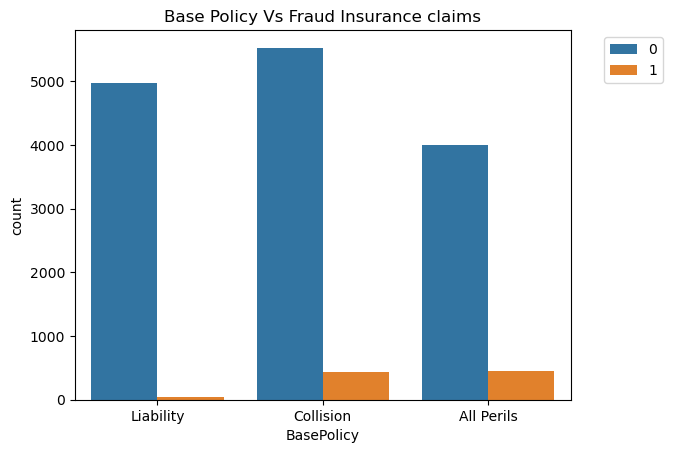

In [55]:
# Collison and all perils has the highest fraud insurance claims
sns.countplot(data=df, x='BasePolicy', hue='FraudFound_P')
plt.title('Base Policy Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

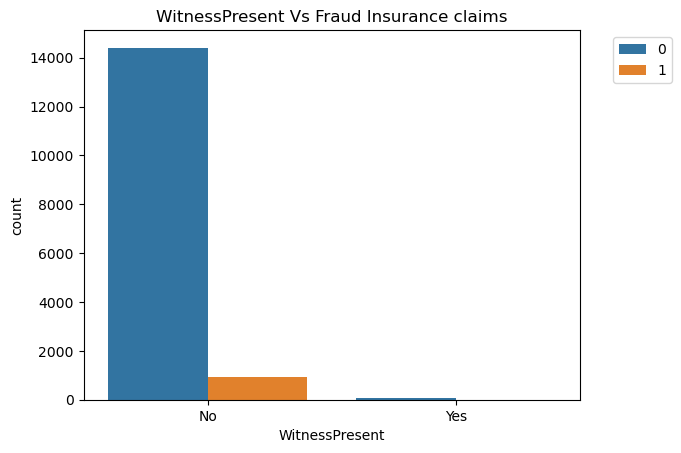

In [56]:
sns.countplot(data=df, x='WitnessPresent', hue='FraudFound_P')
plt.title('WitnessPresent Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [57]:
# to see numeric variables in dataset
df.select_dtypes('int')

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
0,5,1,21,0,1,12,300,1,1994
1,3,4,34,0,2,15,400,4,1994
2,5,2,47,0,3,7,400,3,1994
3,2,1,65,0,4,4,400,2,1994
4,5,2,27,0,5,3,400,1,1994
...,...,...,...,...,...,...,...,...,...
15415,4,5,35,1,15416,5,400,4,1996
15416,5,1,30,0,15417,11,400,3,1996
15417,5,1,24,1,15418,4,400,4,1996
15418,1,2,34,0,15419,6,400,4,1996


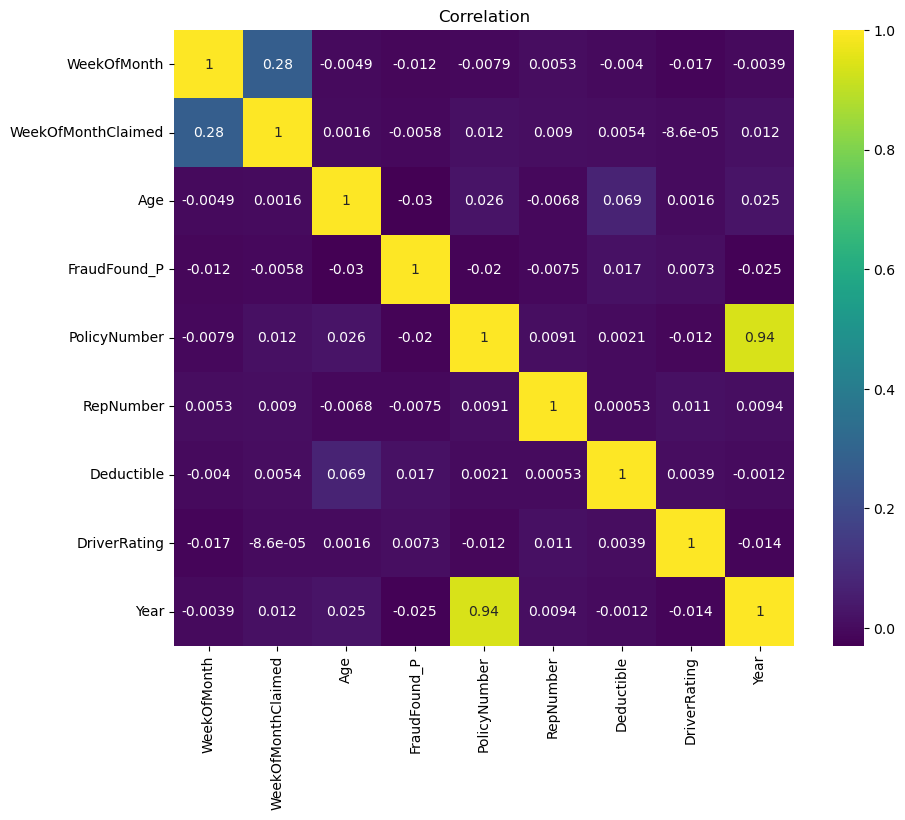

In [58]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.select_dtypes('int').corr(), annot=True, cmap='viridis')
plt.title('Correlation');

In [59]:
# 'Deductible' is highly correlated with target variable
# to see correlated values against targetted variables
df.select_dtypes('int').corr()['FraudFound_P'].sort_values(ascending=False)

FraudFound_P          1.000000
Deductible            0.017345
DriverRating          0.007259
WeekOfMonthClaimed   -0.005783
RepNumber            -0.007529
WeekOfMonth          -0.011872
PolicyNumber         -0.020369
Year                 -0.024778
Age                  -0.029798
Name: FraudFound_P, dtype: float64

In [60]:
# to remove repeatitive columns before ML algorithm
df = df.drop(['Month','WeekOfMonth','WeekOfMonthClaimed','Age','PolicyNumber','RepNumber'], axis=1)

In [61]:
# to check if variables are in their correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15419 entries, 0 to 15419
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DayOfWeek             15419 non-null  object
 1   Make                  15419 non-null  object
 2   AccidentArea          15419 non-null  object
 3   DayOfWeekClaimed      15419 non-null  object
 4   MonthClaimed          15419 non-null  object
 5   Sex                   15419 non-null  object
 6   MaritalStatus         15419 non-null  object
 7   Fault                 15419 non-null  object
 8   PolicyType            15419 non-null  object
 9   VehicleCategory       15419 non-null  object
 10  VehiclePrice          15419 non-null  object
 11  FraudFound_P          15419 non-null  int64 
 12  Deductible            15419 non-null  int64 
 13  DriverRating          15419 non-null  int64 
 14  Days_Policy_Accident  15419 non-null  object
 15  Days_Policy_Claim     15419 non-null  obj

In [62]:
# to return variables whose data type ='object'
df.select_dtypes('object').columns

Index(['DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
       'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [63]:
# to convert all categorical variable into dummy value in a new dataframe: 'dummies'
dummies = pd.get_dummies(df[['DayOfWeek','Make','AccidentArea','DayOfWeekClaimed','MonthClaimed','Sex','MaritalStatus','Fault',
                            'PolicyType', 'VehicleCategory','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                            'PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent',
                            'AgentType', 'NumberOfSuppliments','AddressChange_Claim','NumberOfCars','BasePolicy']], drop_first=True)

In [64]:
# to join 2 dataframes together
df = pd.concat([df,dummies], axis=1)

In [65]:
# to remove original categorical columns from the dataframe
df = df.drop(['DayOfWeek','Make','AccidentArea','DayOfWeekClaimed','MonthClaimed','Sex','MaritalStatus','Fault',
                            'PolicyType', 'VehicleCategory','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                            'PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent',
                            'AgentType', 'NumberOfSuppliments','AddressChange_Claim','NumberOfCars','BasePolicy'], axis=1)

In [66]:
# to double check columns after conversion to dummy variables
df.columns

Index(['FraudFound_P', 'Deductible', 'DriverRating', 'Year',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
       ...
       'AddressChange_Claim_2 to 3 years', 'AddressChange_Claim_4 to 8 years',
       'AddressChange_Claim_no change', 'AddressChange_Claim_under 6 months',
       'NumberOfCars_2 vehicles', 'NumberOfCars_3 to 4', 'NumberOfCars_5 to 8',
       'NumberOfCars_more than 8', 'BasePolicy_Collision',
       'BasePolicy_Liability'],
      dtype='object', length=106)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# to define X and y and add .values of the features and label
X = df.drop('FraudFound_P',axis=1).values

In [69]:
y = df['FraudFound_P'].values

In [70]:
# testing data = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
scaled_X_train = scaler.fit_transform(X_train)

In [74]:
scaled_X_test = scaler.transform(X_test)

In [75]:
# to do oversampling via SMOTE as the positive cases is imbalanced for target variable in 'Fraud'
from imblearn.over_sampling import SMOTE

In [76]:
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions y_train dataset:  (10793,)
Number transactions y_test dataset:  (4626,)


In [77]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 641
Before OverSampling, counts of label '0': 10152 



In [78]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(scaled_X_train, y_train)

In [79]:
# to check the length of both X and y training set after Oversampling with SMOTE
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# to resample positve cases in both  Y train and test set, after over sampling both 1 and 0 cases are equal
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (20304, 105)
After OverSampling, the shape of train_y: (20304,) 

After OverSampling, counts of label '1': 10152
After OverSampling, counts of label '0': 10152


In [80]:
# to import necessary libraries from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [81]:
X_train_res.shape

(20304, 105)

In [82]:
# to build the ANN classifier model
model = Sequential()

model.add(Dense(105, activation='relu')) #105 neurons
model.add(Dropout(0.2)) #Dropout layer to prevent overfitting, 20% of neurons randomly turned off

model.add(Dense(52, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(26, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(13, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [83]:
model.fit(x=X_train_res, y=y_train_res, epochs= 20, batch_size=256,
         validation_data=(scaled_X_test,y_test))

Epoch 1/20
80/80 [==============================] - 2s 8ms/step - loss: 0.6609 - val_loss: 0.5534
Epoch 2/20
80/80 [==============================] - 0s 5ms/step - loss: 0.5417 - val_loss: 0.4363
Epoch 3/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4743 - val_loss: 0.4397
Epoch 4/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4253 - val_loss: 0.3947
Epoch 5/20
80/80 [==============================] - 0s 5ms/step - loss: 0.3823 - val_loss: 0.4025
Epoch 6/20
80/80 [==============================] - 0s 5ms/step - loss: 0.3476 - val_loss: 0.3895
Epoch 7/20
80/80 [==============================] - 0s 5ms/step - loss: 0.3141 - val_loss: 0.3472
Epoch 8/20
80/80 [==============================] - 0s 5ms/step - loss: 0.2868 - val_loss: 0.3339
Epoch 9/20
80/80 [==============================] - 0s 5ms/step - loss: 0.2645 - val_loss: 0.3356
Epoch 10/20
80/80 [==============================] - 0s 6ms/step - loss: 0.2457 - val_loss: 0.3468
Epoch 11/20
80/80 [

In [84]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.660920,0.553362
1,0.541732,0.436296
2,0.474305,0.439666
3,0.425314,0.394722
4,0.382350,0.402528
5,0.347579,0.389501
6,0.314116,0.347237
7,0.286821,0.333863
8,0.264459,0.335563
9,0.245698,0.346792


In [85]:
losses = pd.DataFrame(model.history.history)

<Axes: >

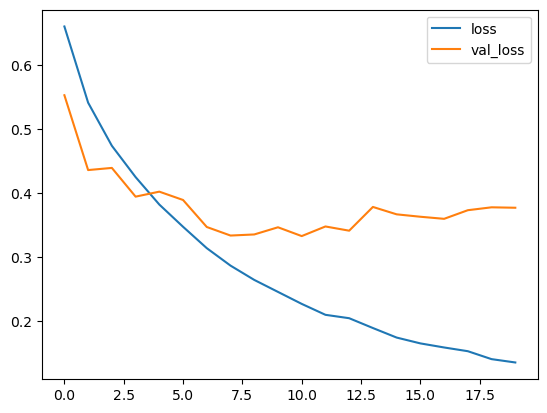

In [86]:
losses.plot()

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
predictions = (model.predict(scaled_X_test)> 0.5).astype('int32')

145/145 [==============================] - 0s 2ms/step


In [89]:
confusion_matrix(y_test,predictions)

array([[4128,  216],
       [ 223,   59]], dtype=int64)

In [90]:
print(classification_report(y_test,predictions)) ## ANN classifer model is 91% accurate

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4344
           1       0.21      0.21      0.21       282

    accuracy                           0.91      4626
   macro avg       0.58      0.58      0.58      4626
weighted avg       0.90      0.91      0.90      4626



In [91]:
import random # import random, set random.seed() as an instance
random.seed(101)
random_ind = random.randint(0,len(df))

In [92]:
new_insuranceclaim = df.drop('FraudFound_P',axis=1).iloc[random_ind]
new_insuranceclaim

Deductible                    400
DriverRating                    3
Year                         1995
DayOfWeek_Monday            False
DayOfWeek_Saturday          False
                            ...  
NumberOfCars_3 to 4         False
NumberOfCars_5 to 8         False
NumberOfCars_more than 8    False
BasePolicy_Collision        False
BasePolicy_Liability         True
Name: 9522, Length: 105, dtype: object

In [93]:
# to reshape the values to be in the same shape as the training data
# X_train_res has 105 columns
new_insuranceclaim.values.reshape(1,105)

array([[400, 3, 1995, False, False, False, True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, True, False, True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, True, False, False, True,
        True, False, False, False, False, True, False, False, False,
        False, False, False, True, False, True, False, False, False,
        False, False, False, True, False, False, True, True, False,
        False, False, False, False, False, False, True, False, False,
        False, False, False, True, False, False, False, False, False,
        False, False, True, False, False, False, True, False, False,
        False, False, False, False, True]], dtype=object)

In [94]:
# to scale this new dataset as the earlier prediction model runs on a scaled dataset
new_insuranceclaim = scaler.transform(new_insuranceclaim.values.reshape(1,105))

In [95]:
new_insuranceclaim

array([[-0.17541516,  0.45639733,  0.15848785, -0.45378606, -0.38129902,
        -0.35797883,  2.45773139, -0.4185642 , -0.402849  , -0.03194087,
        -0.35119043, -0.08421126, -0.00962607, -0.17281902, -0.46664679,
        -0.02152854, -0.00962607, -0.42784789, -0.01361395, -0.07413874,
        -0.04415313, -0.57902639, -0.01925482, -0.08194993, -0.05703852,
         1.98769148, -0.13386358,  0.33653269, -0.56918326, -0.09014591,
        -0.05785031, -0.4585291 , -0.52728962, -0.48378699, -0.28006651,
        -0.28351434, -0.30289586, -0.31972849, -0.29960259, -0.30743087,
        -0.30761136, -0.31654995,  3.26813952, -0.30326031, -0.29424494,
         0.4317813 ,  0.67335499, -0.6623315 , -0.04519426, -0.60829086,
        -0.75475996,  1.43349602, -0.0347266 , -0.15367279, -0.00962607,
        -0.14391379, -0.03603917, -0.04087216,  1.35766567, -0.15430335,
         1.8308512 , -0.17367011, -0.07903483, -0.27483745, -0.40564106,
        -0.05865101, -0.06099092,  0.10824641, -0.0

In [96]:
# to pass the insurance claim into the ANN classifier prediction model
predictions = (model.predict(new_insuranceclaim)> 0.5).astype('int32')

1/1 [==============================] - 0s 25ms/step


In [97]:
# the model returns a prediction of '0', this means that it is an Insurance Fraud
predictions

array([[0]])

In [98]:
df.iloc[random_ind]['FraudFound_P']

0